In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

## Task 1

In [2]:
df = pd.read_csv('./data/bikes_rent.csv')
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


<Figure size 1200x800 with 0 Axes>

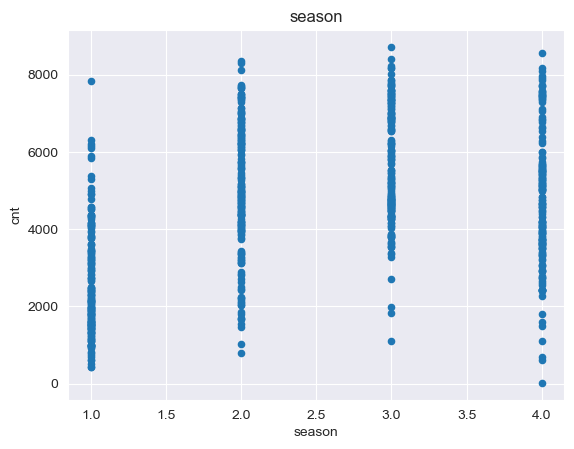

<Figure size 1200x800 with 0 Axes>

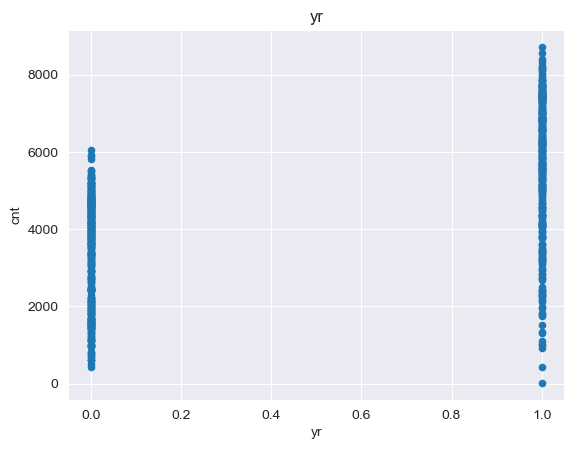

<Figure size 1200x800 with 0 Axes>

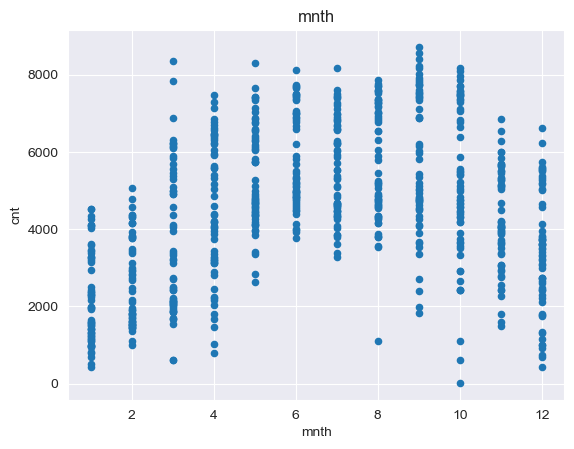

<Figure size 1200x800 with 0 Axes>

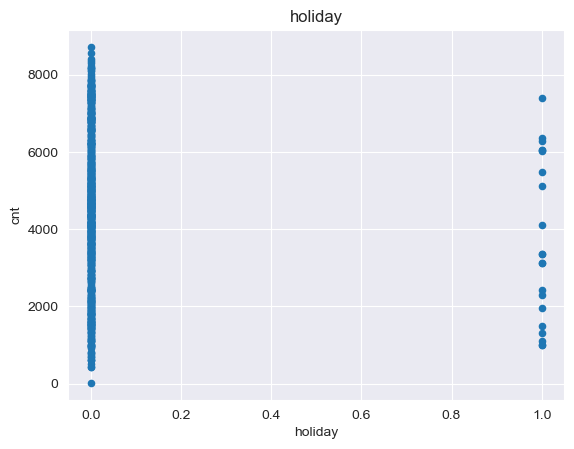

<Figure size 1200x800 with 0 Axes>

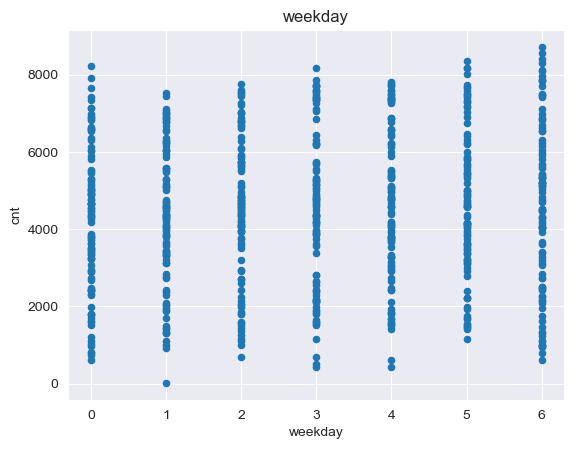

<Figure size 1200x800 with 0 Axes>

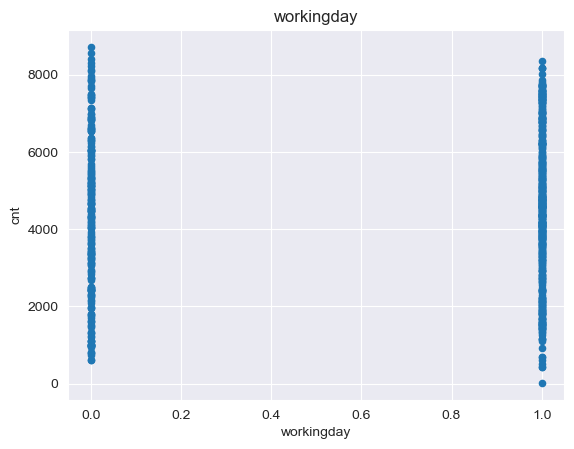

<Figure size 1200x800 with 0 Axes>

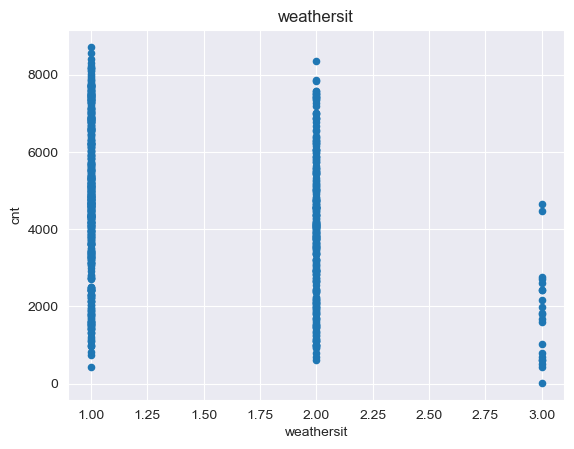

<Figure size 1200x800 with 0 Axes>

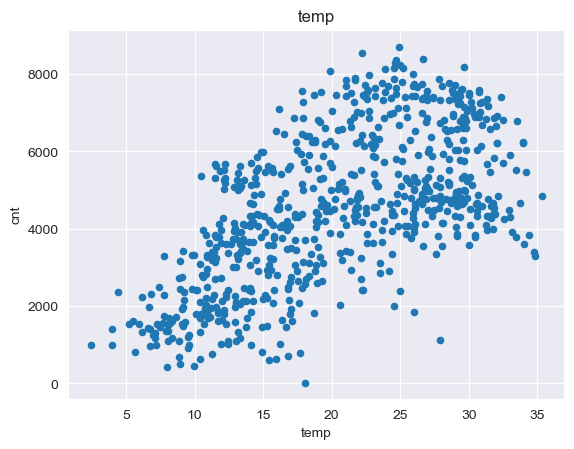

<Figure size 1200x800 with 0 Axes>

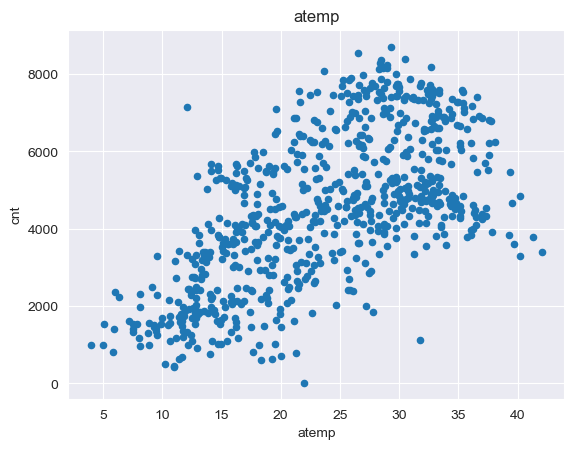

<Figure size 1200x800 with 0 Axes>

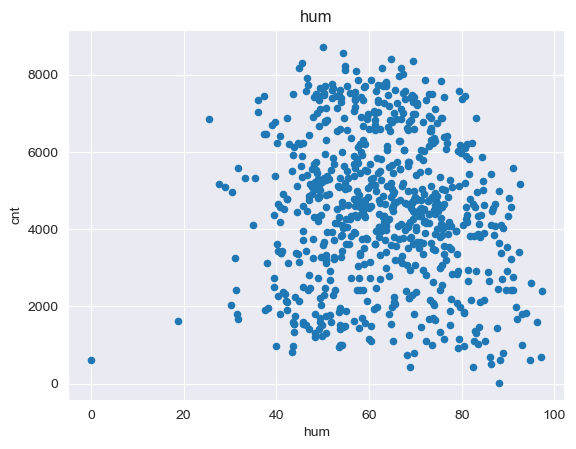

<Figure size 1200x800 with 0 Axes>

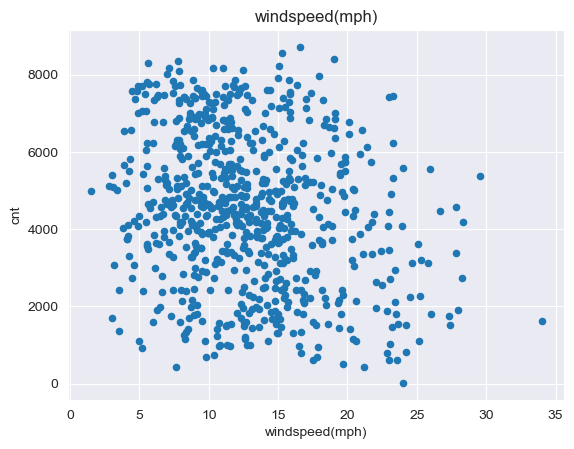

<Figure size 1200x800 with 0 Axes>

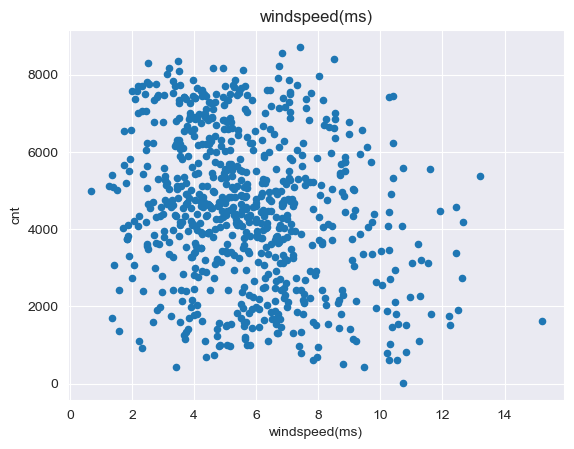

<Figure size 1200x800 with 0 Axes>

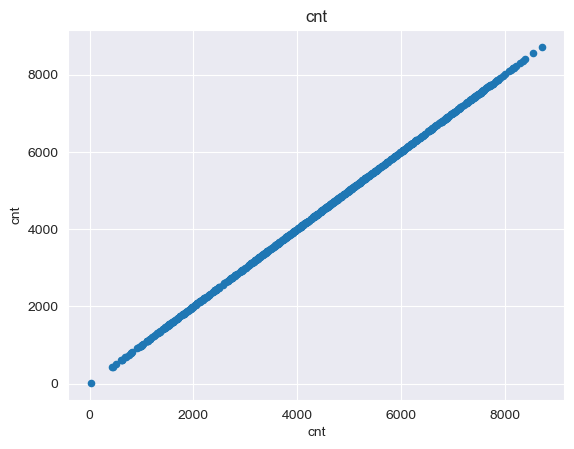

In [3]:
for column in df.select_dtypes(include='number').columns:
    
    plt.figure(figsize=(12, 8))
    
    df.plot(kind='scatter', x=column, y='cnt', legend=False)

    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('cnt')

    plt.show()

## Task 2

In [4]:
correlation_with_target = df.corr()['cnt'].drop('cnt')
# Display the correlation with the target column
correlation_with_target

season            0.406100
yr                0.566710
mnth              0.279977
holiday          -0.068348
weekday           0.067443
workingday        0.061156
weathersit       -0.297391
temp              0.627494
atemp             0.631066
hum              -0.100659
windspeed(mph)   -0.234545
windspeed(ms)    -0.234545
Name: cnt, dtype: float64

In [5]:
Features = df.drop('cnt', axis=1)
Target = df['cnt']
result = Features.corrwith(Target, method='spearman')
result.name = 'cnt'
result

season            0.398442
yr                0.571996
mnth              0.271995
holiday          -0.064132
weekday           0.064396
workingday        0.057769
weathersit       -0.272097
temp              0.622034
atemp             0.622782
hum              -0.098126
windspeed(mph)   -0.217197
windspeed(ms)    -0.217197
Name: cnt, dtype: float64

## Task 3

In [6]:
corr_features=['temp', 'atemp', 'hum', 'windspeed(mph)', 'windspeed(ms)']

def func_corr(features):
    for feature in features:
        df_corr = df[['cnt', feature]].corr()
        print(df_corr, '\n')

func_corr(corr_features)

           cnt      temp
cnt   1.000000  0.627494
temp  0.627494  1.000000 

            cnt     atemp
cnt    1.000000  0.631066
atemp  0.631066  1.000000 

          cnt       hum
cnt  1.000000 -0.100659
hum -0.100659  1.000000 

                     cnt  windspeed(mph)
cnt             1.000000       -0.234545
windspeed(mph) -0.234545        1.000000 

                    cnt  windspeed(ms)
cnt            1.000000      -0.234545
windspeed(ms) -0.234545       1.000000 


## Task 4

In [7]:
Features.mean(skipna=True)

season             2.496580
yr                 0.500684
mnth               6.519836
holiday            0.028728
weekday            2.997264
workingday         0.683995
weathersit         1.395349
temp              20.310776
atemp             23.717699
hum               62.789406
windspeed(mph)    12.762576
windspeed(ms)      5.705220
dtype: float64

In [8]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression

df_shuffled = shuffle(df, random_state=42).reset_index(drop=True)

# Separate features (X) and labels (y)
X = df_shuffled.drop('cnt', axis=1)
y = df_shuffled['cnt']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train your model (e.g., Linear Regression)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Task 5

In [9]:
model.coef_

array([ 5.80546284e+02,  1.01147452e+03, -1.67913241e+02, -8.01839264e+01,
        1.28376517e+02,  6.99520662e+01, -3.21010945e+02,  4.23492029e+02,
        5.79605845e+02, -1.50148175e+02,  1.80641759e+13, -1.80641759e+13])

In [10]:
model.intercept_

4502.040437881261

In [11]:
# Evaluating the Linear Regression model
model.score(X_test, y_test)
# print(cross_val_score(linearModel, X_train, y_train, cv=5))

0.7901886557583577

In [12]:
for key, value in zip(X.columns, model.coef_):
    print(f'{key}: {value}')

season: 580.5462838468518
yr: 1011.4745223700136
mnth: -167.91324139678835
holiday: -80.18392644456458
weekday: 128.37651667254207
workingday: 69.95206620798047
weathersit: -321.0109454792826
temp: 423.49202922543344
atemp: 579.6058445040811
hum: -150.14817544364294
windspeed(mph): 18064175948937.043
windspeed(ms): -18064175949143.39


## Task 6

#### Lasso

In [13]:
from sklearn.linear_model import Lasso, LassoCV

# Create a Lasso regression model
lasso_model = Lasso(alpha=0.1)

# Train the model
lasso_model.fit(X_train, y_train)

# Print the coefficients and intercept
lasso_model.coef_

array([ 5.69488931e+02,  1.00767664e+03, -1.55041846e+02, -8.09520108e+01,
        1.30996605e+02,  6.83672228e+01, -3.24805319e+02,  4.36175953e+02,
        5.67186923e+02, -1.49720334e+02, -2.04921488e+02, -3.68831941e-08])

In [14]:
lasso_model.intercept_

4502.5747068176315

In [15]:
# Create a Lasso regression model with cross-validated alpha selection
lasso_cv_model = LassoCV(alphas=[0.1, 1.0, 10.0], cv=5)

# Train the model
lasso_cv_model.fit(X_train, y_train)

# Get the optimal alpha value
optimal_alpha = lasso_cv_model.alpha_

# Make predictions
predictions = lasso_cv_model.predict(X_test)

/Users/vokur/anaconda3/envs/goit-d-sci-hw/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 413138.2473192215, tolerance: 184970.89167580297
  model = cd_fast.enet_coordinate_descent_gram(


In [16]:
optimal_alpha

10.0

In [17]:
lasso_cv_model.coef_

array([ 5.08362742e+02,  9.99581786e+02, -9.29907403e+01, -7.69543329e+01,
        1.21673362e+02,  6.12566143e+01, -3.21854002e+02,  4.28768787e+02,
        5.73219638e+02, -1.40657129e+02, -1.93550633e+02, -3.38398354e-08])

In [18]:
lasso_cv_model.intercept_

4503.025688120597

In [19]:
for key, value in zip(X.columns, lasso_cv_model.coef_):
    print(f'{key}: {value}')

season: 508.3627418528776
yr: 999.5817859335338
mnth: -92.990740294459
holiday: -76.95433286266014
weekday: 121.6733624911821
workingday: 61.25661429798772
weathersit: -321.85400188613585
temp: 428.76878657746846
atemp: 573.2196376413556
hum: -140.6571286218536
windspeed(mph): -193.5506326517527
windspeed(ms): -3.383983543552429e-08


#### Ridge

In [20]:
from sklearn.linear_model import RidgeCV

# Create a Ridge regression model with cross-validated alpha selection
ridge_cv_model = RidgeCV(alphas=[0.1, 1.0, 10.0], cv=5)

# Train the model
ridge_cv_model.fit(X_train, y_train)

# Get the optimal alpha value
optimal_alpha = ridge_cv_model.alpha_

# Make predictions
predictions = ridge_cv_model.predict(X_test)

In [21]:
optimal_alpha

10.0

In [22]:
ridge_cv_model.coef_

array([ 534.2807772 ,  991.16474947, -122.30390013,  -81.59681033,
        128.02202686,   68.15864286, -320.17942415,  475.68902133,
        524.57352262, -150.769815  , -103.34610602, -103.34610602])

In [23]:
ridge_cv_model.intercept_

4503.226362603679

In [24]:
for key, value in zip(X.columns, ridge_cv_model.coef_):
    print(f'{key}: {value}')

season: 534.2807772013829
yr: 991.1647494725268
mnth: -122.30390012933168
holiday: -81.59681033124498
weekday: 128.02202685521286
workingday: 68.15864285654447
weathersit: -320.17942414892553
temp: 475.68902132617296
atemp: 524.5735226233705
hum: -150.76981500312118
windspeed(mph): -103.34610601731254
windspeed(ms): -103.34610602490275


## Task 7

In [25]:
import numpy as np

alphas = np.arange(1, 500, 50)

### coefs_lasso

In [26]:
# List to store coefficients for each alpha
coefs_lasso = []

# Iterate over alpha values
for alpha in alphas:
    # Create a Lasso regression model
    lasso_model = Lasso(alpha=alpha)

    # Train the model
    lasso_model.fit(X_scaled, y)

    # Append coefficients to the list
    coefs_lasso.append(lasso_model.coef_)

# Convert the list of coefficients to a NumPy array for easier handling
coefs_lasso = np.array(coefs_lasso)
coefs_lasso

array([[ 5.60241616e+02,  1.01946349e+03, -1.28730627e+02,
        -8.61527813e+01,  1.37347894e+02,  5.52123706e+01,
        -3.32369857e+02,  3.76363236e+02,  5.76530794e+02,
        -1.44129155e+02, -1.97139689e+02, -2.80510382e-08],
       [ 4.10969632e+02,  9.77019409e+02, -0.00000000e+00,
        -5.34489688e+01,  9.19434374e+01,  1.75372118e+01,
        -3.18125568e+02,  3.22829934e+02,  6.10031512e+02,
        -9.10689615e+01, -1.45066095e+02, -2.29895576e-08],
       [ 3.70077089e+02,  9.35945490e+02,  0.00000000e+00,
        -1.21619360e+01,  4.88886342e+01,  0.00000000e+00,
        -3.08805664e+02,  2.69417263e+02,  6.32502623e+02,
        -2.75042876e+01, -9.37749037e+01, -2.41636842e-08],
       [ 3.32835717e+02,  8.91870058e+02,  0.00000000e+00,
        -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -2.79616688e+02,  2.11052030e+02,  6.62920880e+02,
        -0.00000000e+00, -5.01551472e+01, -2.62778724e-08],
       [ 2.98134448e+02,  8.45652857e+02,  0.0000000

In [27]:
# Display the coefficients for each alpha
for i, alpha in enumerate(alphas):
    print(f'Alpha = {alpha}: Coefficients = {coefs_lasso[i]}, \n')

Alpha = 1: Coefficients = [ 5.60241616e+02  1.01946349e+03 -1.28730627e+02 -8.61527813e+01
  1.37347894e+02  5.52123706e+01 -3.32369857e+02  3.76363236e+02
  5.76530794e+02 -1.44129155e+02 -1.97139689e+02 -2.80510382e-08], 

Alpha = 51: Coefficients = [ 4.10969632e+02  9.77019409e+02 -0.00000000e+00 -5.34489688e+01
  9.19434374e+01  1.75372118e+01 -3.18125568e+02  3.22829934e+02
  6.10031512e+02 -9.10689615e+01 -1.45066095e+02 -2.29895576e-08], 

Alpha = 101: Coefficients = [ 3.70077089e+02  9.35945490e+02  0.00000000e+00 -1.21619360e+01
  4.88886342e+01  0.00000000e+00 -3.08805664e+02  2.69417263e+02
  6.32502623e+02 -2.75042876e+01 -9.37749037e+01 -2.41636842e-08], 

Alpha = 151: Coefficients = [ 3.32835717e+02  8.91870058e+02  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -2.79616688e+02  2.11052030e+02
  6.62920880e+02 -0.00000000e+00 -5.01551472e+01 -2.62778724e-08], 

Alpha = 201: Coefficients = [ 2.98134448e+02  8.45652857e+02  0.00000000e+00 -0.00000000e+00
  

### coefs_ridge

In [28]:
from sklearn.linear_model import Ridge

# List to store coefficients for each alpha
coefs_ridge = []

# Iterate over alpha values
for alpha in alphas:
    # Create a Ridge regression model
    ridge_model = Ridge(alpha=alpha)

    # Train the model
    ridge_model.fit(X_scaled, y)

    # Append coefficients to the list
    coefs_ridge.append(ridge_model.coef_)

# Convert the list of coefficients to a NumPy array for easier handling
coefs_ridge = np.array(coefs_ridge)
coefs_ridge

array([[ 563.06457225, 1018.94837879, -131.87332028,  -86.746098  ,
         138.00511118,   55.90311038, -332.3497885 ,  386.45788919,
         566.34704706, -145.0713273 ,  -99.25944108,  -99.25944115],
       [ 461.1786324 ,  954.30774189,  -41.56545001,  -84.91347027,
         126.60366663,   54.2516911 , -313.27515141,  458.90147709,
         481.44350031, -151.29101033, -101.62731482, -101.62731483],
       [ 403.97653045,  898.08362212,    5.67424346,  -81.91106159,
         117.94141144,   52.72848389, -298.40898086,  455.28986839,
         467.43141748, -152.68605059, -102.10167084, -102.10167084],
       [ 366.60423851,  848.46346471,   34.02728278,  -78.77196479,
         110.68012006,   51.25719208, -286.12515935,  447.47982533,
         455.75402966, -151.48320603, -102.00537592, -102.00537593],
       [ 339.74528956,  804.25104797,   52.48987295,  -75.71740756,
         104.40346414,   49.84189502, -275.48609488,  438.50968939,
         444.7642744 , -148.94396978, -101.5

In [29]:
# Display the coefficients for each alpha
for i, alpha in enumerate(alphas):
    print(f'Alpha = {alpha}: Coefficients = {coefs_ridge[i]}, \n')

Alpha = 1: Coefficients = [ 563.06457225 1018.94837879 -131.87332028  -86.746098    138.00511118
   55.90311038 -332.3497885   386.45788919  566.34704706 -145.0713273
  -99.25944108  -99.25944115], 

Alpha = 51: Coefficients = [ 461.1786324   954.30774189  -41.56545001  -84.91347027  126.60366663
   54.2516911  -313.27515141  458.90147709  481.44350031 -151.29101033
 -101.62731482 -101.62731483], 

Alpha = 101: Coefficients = [ 403.97653045  898.08362212    5.67424346  -81.91106159  117.94141144
   52.72848389 -298.40898086  455.28986839  467.43141748 -152.68605059
 -102.10167084 -102.10167084], 

Alpha = 151: Coefficients = [ 366.60423851  848.46346471   34.02728278  -78.77196479  110.68012006
   51.25719208 -286.12515935  447.47982533  455.75402966 -151.48320603
 -102.00537592 -102.00537593], 

Alpha = 201: Coefficients = [ 339.74528956  804.25104797   52.48987295  -75.71740756  104.40346414
   49.84189502 -275.48609488  438.50968939  444.7642744  -148.94396978
 -101.58638458 -101.58

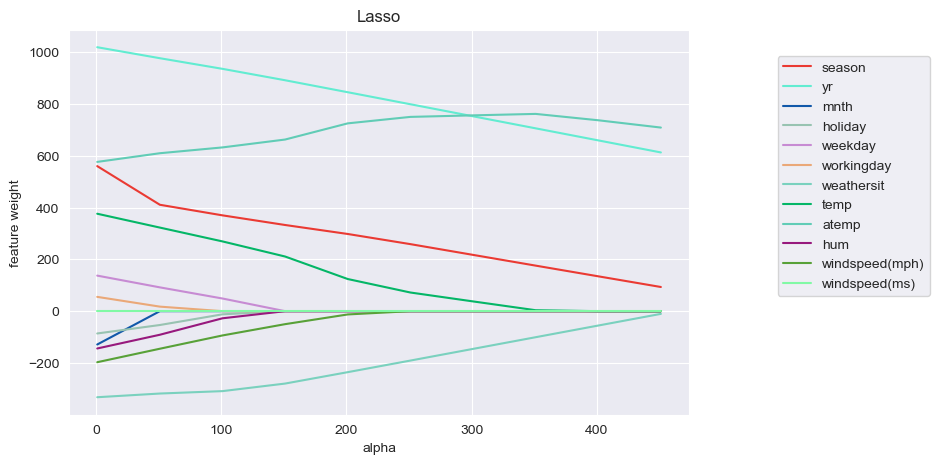

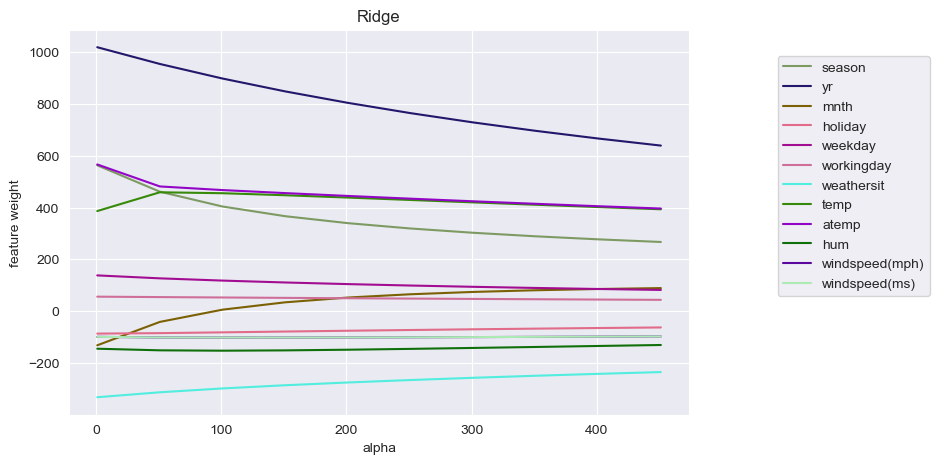

In [30]:
plt.figure(figsize=(8, 5))

for coef, feature in zip(coefs_lasso.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))

plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Lasso")

plt.figure(figsize=(8, 5))
for coef, feature in zip(coefs_ridge.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))

plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Ridge")

plt.show()

1. В Лассо (регуляризация L1) штрафной член пропорционален абсолютным значениям коэффициентов. В результате Лассо имеет тенденцию сводить некоторые коэффициенты точно к нулю, эффективно выполняя выбор признаков. Следовательно, Лассо имеет тенденцию более агрессивно уменьшать веса, особенно когда среди функций существует мультиколлинеарность.
2.  Когда параметр регуляризации (альфа) в регрессии Лассо становится очень большим, эффект часто называют «сильной регуляризацией» или «высоким штрафом». В регрессии Лассо штрафной член добавляется к функции потерь линейной регрессии, и этот штрафной член пропорционален абсолютным значениям коэффициентов.
3. В регрессии Лассо штраф L1 способствует разреженности модели, сводя некоторые коэффициенты точно к нулю. Следовательно, вполне вероятно, что для любого положительного значения альфа в регрессии Лассо признак 'windspeed' с коэффициентом ниже $10^{-3}$ будут исключены из модели.
В регрессии Ridge penalty L2 не приводит к нулевым коэффициентам, но имеет тенденцию сжимать их к нулю. Полное исключение признака менее вероятно, особенно если коэффициент небольшой, но не совсем нулевой.
4. Лассо-регрессия (регуляризация L1) особенно хорошо подходит для выбора неинформативных признаков и выполнения выбора признаков. Это связано с тем, что штрафной член L1 в целевой функции Лассо способствует разреженности, сводя некоторые коэффициенты точно к нулю. В результате признаки, практически не влияющие на целевую переменную, имеют тенденцию иметь нулевые коэффициенты, что фактически исключает их из модели.

    

## Task 8

In [31]:
alphas = np.arange(1, 100, 5)

# Create a Lasso regression model with cross-validated alpha selection
lasso_cv_model = LassoCV(alphas=alphas, cv=5)

# Train the model
lasso_cv_model.fit(X_train, y_train)

# Get the optimal alpha value
optimal_alpha = lasso_cv_model.alpha_
print(f'Alpha = {optimal_alpha}')

Alpha = 6


In [32]:
from sklearn.metrics import mean_squared_error

# # Make predictions
predictions = lasso_cv_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 679798.6308397977


In [33]:
def create_plot(data, title, xlabel, ylabel, figsize=None):
    size = figsize or (12, 8)
    plt.figure(figsize=size)

    x = [e[0] for e in data]
    y = [e[1] for e in data]

    sns.set_style("whitegrid")  # Add this line to enable grid
    sns.lineplot(x=x, y=y)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.show()

/Users/vokur/anaconda3/envs/goit-d-sci-hw/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 442356.1651352048, tolerance: 143959.75886863278
  model = cd_fast.enet_coordinate_descent_gram(
/Users/vokur/anaconda3/envs/goit-d-sci-hw/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 304301.51455527544, tolerance: 148136.84712761396
  model = cd_fast.enet_coordinate_descent_gram(


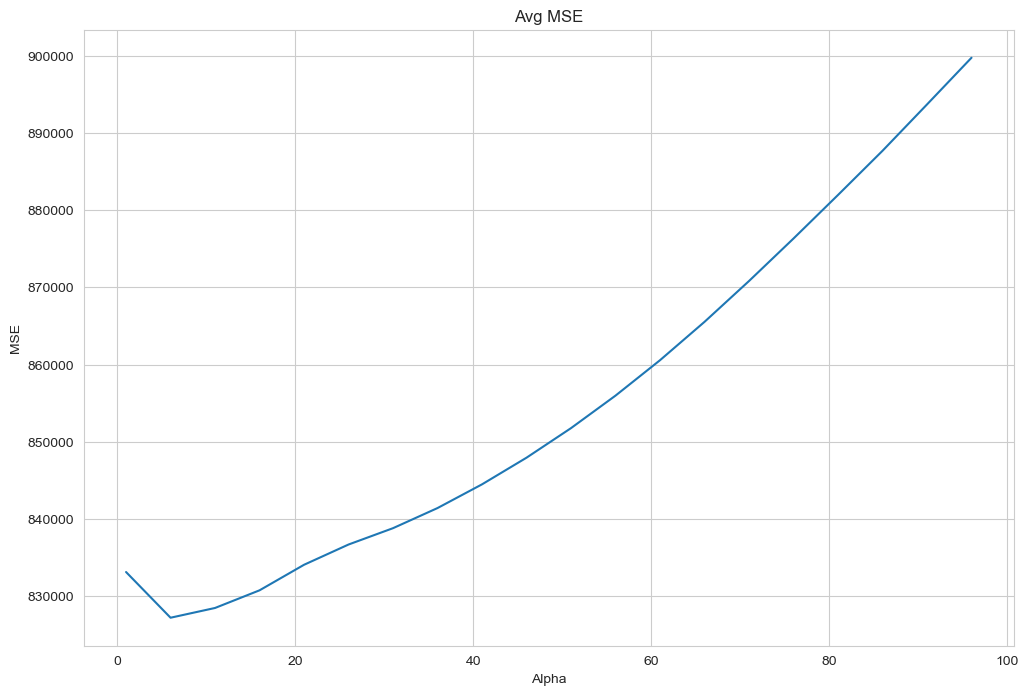

In [34]:
from sklearn.model_selection import cross_val_score

# List to store row-averaged MSE for each alpha
mse_values = []

# Iterate over alpha values
for alpha in alphas:
    # Create a Lasso regression model with cross-validated alpha selection
    lasso_model = LassoCV(alphas=[alpha], cv=5)

    # Perform cross-validation and calculate row-averaged MSE
    mse = np.mean(cross_val_score(lasso_model, X_train, y_train, scoring='neg_mean_squared_error', cv=5))

    # Append alpha and MSE to the list
    mse_values.append((alpha, -mse)) 

# Plot the row-averaged MSE as a function of alpha
create_plot(mse_values, 'Avg MSE', 'Alpha', 'MSE')

In [35]:
for key, value in zip(X.columns, lasso_cv_model.coef_):
    print(f'{key}: {value}')

season: 533.0600826719921
yr: 1002.8524860661328
mnth: -118.0619145636494
holiday: -78.56941858654474
weekday: 125.44059421115378
workingday: 64.12971894537756
weathersit: -323.0464931369359
temp: 431.7217796681734
atemp: 570.821821978036
hum: -144.31938550253744
windspeed(mph): -198.14393256882337
windspeed(ms): -3.512693327851769e-08


## Task 9

Alphas with minimum MSE:
Alpha = 6, MSE = 731329.5172720718
Alpha = 41, MSE = 724760.1741860429
Alpha = 1, MSE = 718529.6231948738


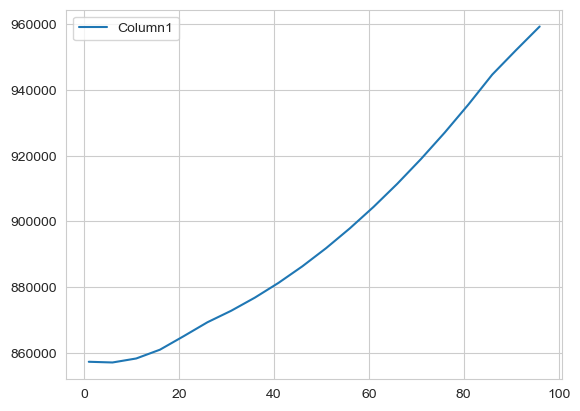

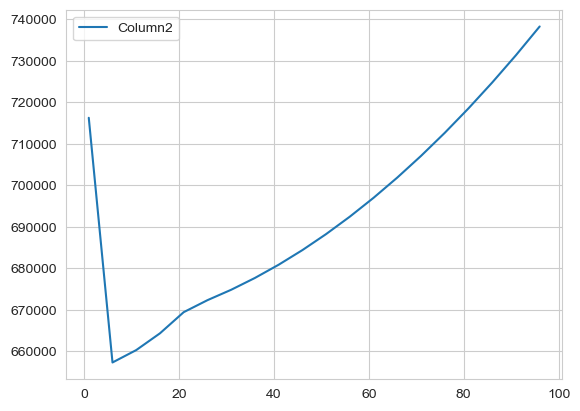

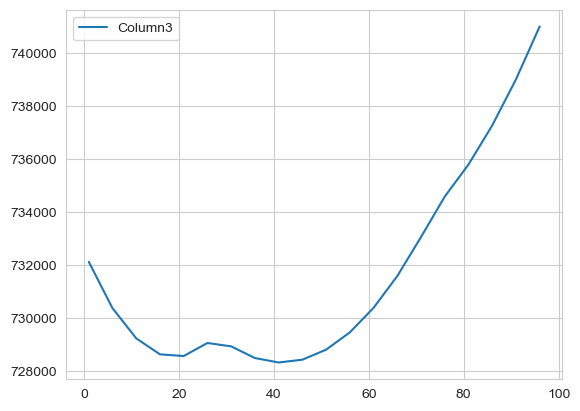

In [36]:
lasso_model = LassoCV(alphas=alphas, cv=4)
lasso_model.fit(X_train, y_train)

index_min = lasso_model.mse_path_.argmin(axis=0)

result_dict=dict()

print('Alphas with minimum MSE:')
for key, value in zip(lasso_model.alphas_[index_min], lasso_model.mse_path_):
    result_dict[key]=value

for key,value in list(result_dict.items())[:4]:
    print(f'Alpha = {key}, MSE = {min(value)}')

for i in range(3):
    plt.plot(lasso_model.alphas_, lasso_model.mse_path_[:,i], label='Column'+ str(i+1))
    plt.grid(True)
    plt.legend(loc='upper left')
    plt.show()

### Task 10

#### Q1

In [37]:
result_dict=dict()

for key, value in zip(X.columns, lasso_cv_model.coef_):
    result_dict[key]=value

sorted_items = sorted(result_dict.items(), key=lambda x: x[1], reverse=True)
sorted_dict = dict(sorted_items)

for key,value in list(sorted_dict.items())[:4]:
    print(key, value)

yr 1002.8524860661328
atemp 570.821821978036
season 533.0600826719921
temp 431.7217796681734


<Figure size 1200x800 with 0 Axes>

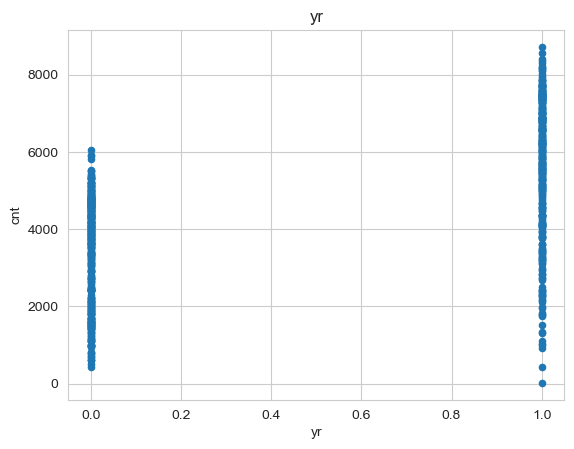

<Figure size 1200x800 with 0 Axes>

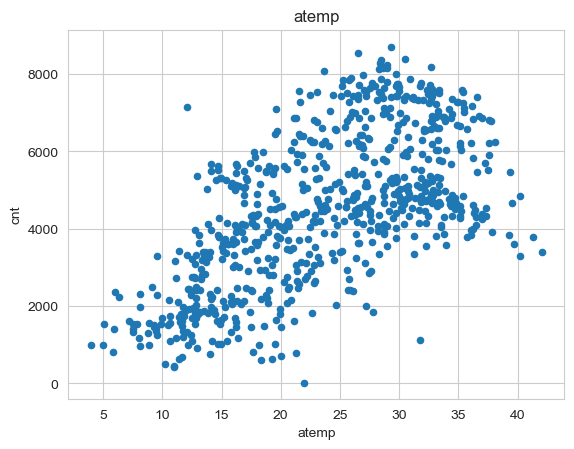

<Figure size 1200x800 with 0 Axes>

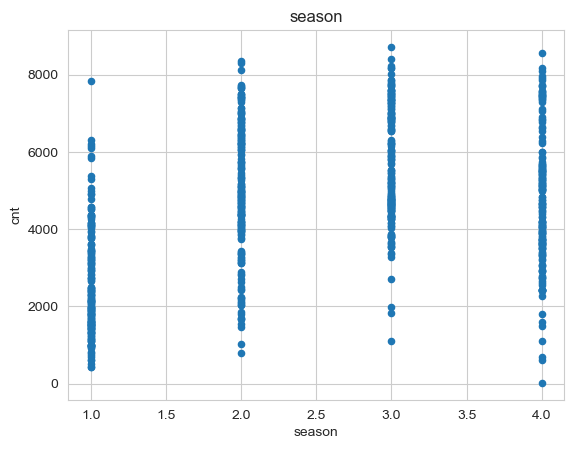

<Figure size 1200x800 with 0 Axes>

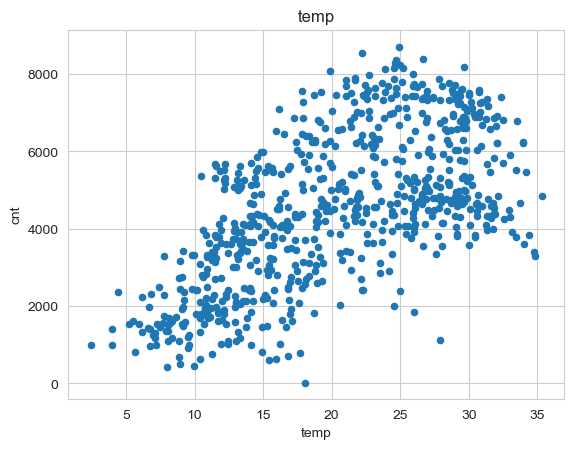

In [38]:
columns=['yr', 'atemp', 'season', 'temp']

selected_columns = df[columns]

for column in selected_columns.select_dtypes(include='number').columns:

    plt.figure(figsize=(12, 8))

    df.plot(kind='scatter', x=column, y='cnt', legend=False)

    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('cnt')

    plt.show()

**Из списка выбранных признаков с наибольшими положительными коэффициентами возрастающая линейная зависимость присуща явно признакам - atemp и temp. Утверждение - чем больше значение этих признаков, тем больше людей захотят взять велосипеды - True.**

#### Q2

In [39]:
result_dict=dict()

for key, value in zip(X.columns, lasso_cv_model.coef_):
    result_dict[key]=value

sorted_items = sorted(result_dict.items(), key=lambda x: x[1])
sorted_dict = dict(sorted_items)

for key,value in list(sorted_dict.items())[:3]:
    print(key, value)

weathersit -323.0464931369359
windspeed(mph) -198.14393256882337
hum -144.31938550253744


<Figure size 1200x800 with 0 Axes>

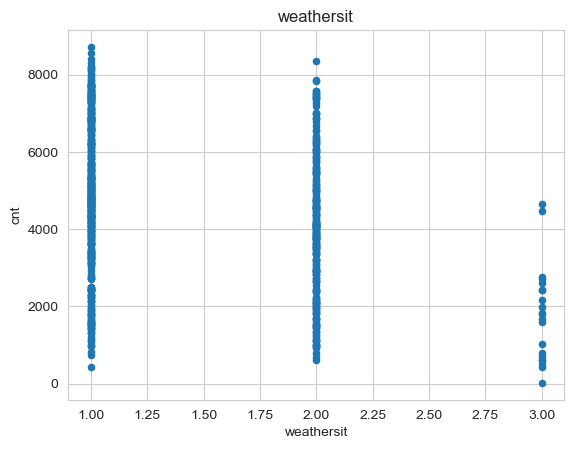

<Figure size 1200x800 with 0 Axes>

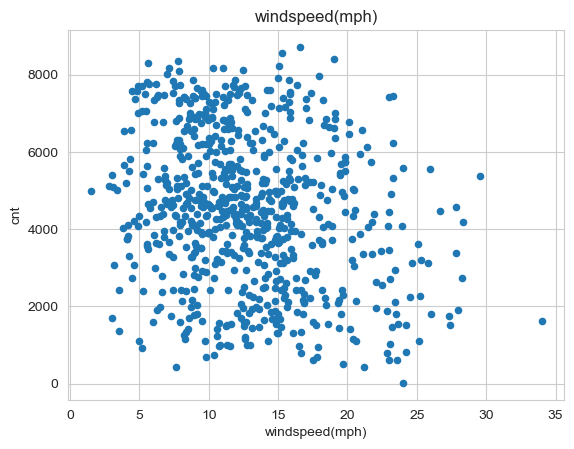

<Figure size 1200x800 with 0 Axes>

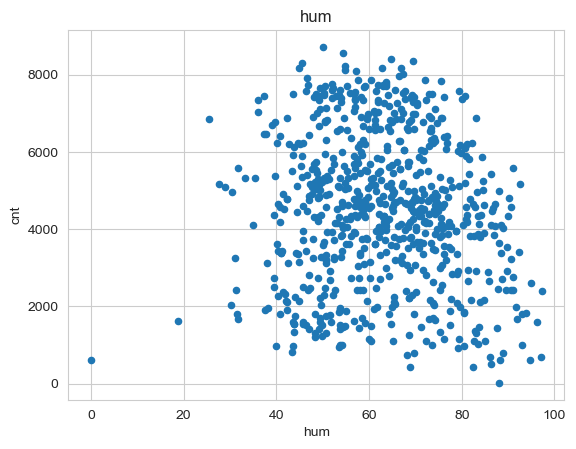

In [40]:
columns=['weathersit', 'windspeed(mph)', 'hum']

selected_columns = df[columns]

for column in selected_columns.select_dtypes(include='number').columns:

    plt.figure(figsize=(12, 8))

    df.plot(kind='scatter', x=column, y='cnt', legend=False)

    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('cnt')

    plt.show()

**Из списка выбранных признаков с наибольшим по модулю отрицательным коэффициентом убывающая линейная зависимость присуща явно признакам - windspeed(mph) и hum. Утверждение - чем больше величина этих признаков (по модулю), тем меньше людей захотят взять велосипеды - True.**

#### Q3

In [41]:
result_dict=dict()
threshold = 1e-3

for key, value in zip(X.columns, lasso_cv_model.coef_):
    result_dict[key]=value

filtered_dict = {key: value for key, value in result_dict.items() if abs(value) < threshold}

for key,value in filtered_dict.items():
    print(key, value)

windspeed(ms) -3.512693327851769e-08


<Figure size 1200x800 with 0 Axes>

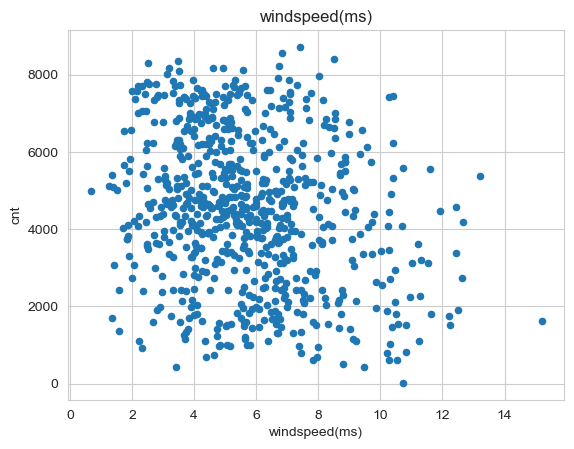

In [42]:
plt.figure(figsize=(12, 8))

df.plot(kind='scatter', x='windspeed(ms)', y='cnt', legend=False)

plt.title('windspeed(ms)')
plt.xlabel('windspeed(ms)')
plt.ylabel('cnt')

plt.show()

**Выбранный признак (windspeed(ms)) влияет на спрос на велосипеды, но этот признак уже был учтен в параметре windspeed(mph) и, являясь по сути просто дублем последнего, но в других единицах измерения, является избыточным для модели.**